In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "LR.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "LR.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "LR.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "LR.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "LR.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "LR.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Logistic Regression model
    LR = LogisticRegression(random_state=0)
    LR.fit(X_train,y_train)
    y_predicts = LR.predict(X_test)
    y_pred_probs = LR.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.1936618478452239, 'Positive_prot_pred': 0.7938144329896907, 'Positive_non_prot_pred': 0.9874762808349146, 'Negative_prot_pred': 0.20618556701030927, 'Negative_non_prot_pred': 0.012523719165085389}
Equal opportunity
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.08548358693813618, 'TPR_protected': 0.909985935302391, 'TPR_non_protected': 0.9954695222405272, 'TNR_protected': 0.525096525096525, 'TNR_non_protected': 0.10628019323671498}
Equalized odds
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.5042999187979462, 'TPR_protected': 0.909985935302391, 'TPR_non_protected': 0.9954695222405272, 'TNR_protected': 0.525096525096525, 'TNR_non_protected': 0.10628019323671498}
Predictive parity
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.0886411052437186, 'TPR_protected'

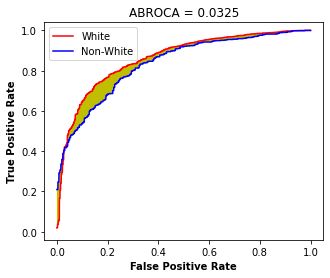

ABROCA: 0.03247610827862542


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.651121382636656, 'accuracy': 0.6790606653620352, 'fairness': -0.20902532746407376, 'Positive_prot_pred': 0.763915547024952, 'Positive_non_prot_pred': 0.5548902195608783, 'Negative_prot_pred': 0.236084452975048, 'Negative_non_prot_pred': 0.44510978043912175}
Equal opportunity
{'balanced_accuracy': 0.651121382636656, 'accuracy': 0.6790606653620352, 'fairness': 0.16264322712290058, 'TPR_protected': 0.8521739130434782, 'TPR_non_protected': 0.6895306859205776, 'TNR_protected': 0.4090909090909091, 'TNR_non_protected': 0.6116071428571429}
Equalized odds
{'balanced_accuracy': 0.651121382636656, 'accuracy': 0.6790606653620352, 'fairness': 0.36515946088913437, 'TPR_protected': 0.8521739130434782, 'TPR_non_protected': 0.6895306859205776, 'TNR_protected': 0.4090909090909091, 'TNR_non_protected': 0.6116071428571429}
Predictive parity
{'balanced_accuracy': 0.651121382636656, 'accuracy': 0.6790606653620352, 'fairness': 0.05164310762445323, 'TPR_protected': 

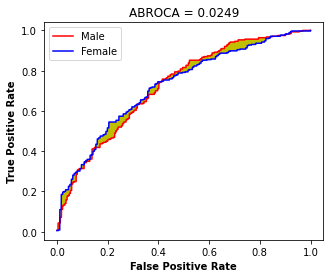

ABROCA: 0.02490539399627608


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.8333333333333333, 'accuracy': 0.9, 'fairness': -0.08521303258145363, 'Positive_prot_pred': 0.8947368421052632, 'Positive_non_prot_pred': 0.8095238095238095, 'Negative_prot_pred': 0.10526315789473684, 'Negative_non_prot_pred': 0.19047619047619047}
Equal opportunity
{'balanced_accuracy': 0.8333333333333333, 'accuracy': 0.9, 'fairness': 0.04643962848297212, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0}
Equalized odds
{'balanced_accuracy': 0.8333333333333333, 'accuracy': 0.9, 'fairness': 0.5464396284829721, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0}
Predictive parity
{'balanced_accuracy': 0.8333333333333333, 'accuracy': 0.9, 'fairness': 0.05882352941176472, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8947368421052632, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0}
Predi

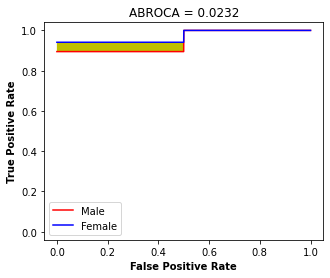

ABROCA: 0.023219814241487984


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.20407009609949123, 'Positive_prot_pred': 0.5172413793103449, 'Positive_non_prot_pred': 0.7213114754098361, 'Negative_prot_pred': 0.4827586206896552, 'Negative_non_prot_pred': 0.2786885245901639}
Equal opportunity
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.04070660522273428, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 0.8421052631578947}
Equalized odds
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.1615643050278025, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 0.8421052631578947}
Predictive parity
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.034848484848484906, 'TPR_protecte

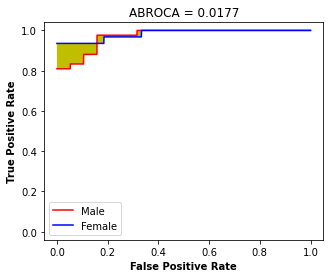

ABROCA: 0.01765229926839795


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': -0.06823765914675006, 'Positive_prot_pred': 0.8925619834710744, 'Positive_non_prot_pred': 0.8243243243243243, 'Negative_prot_pred': 0.10743801652892562, 'Negative_non_prot_pred': 0.17567567567567569}
Equal opportunity
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': 0.013302752293578024, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.95, 'TNR_protected': 0.75, 'TNR_non_protected': 0.7142857142857143}
Equalized odds
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': 0.04901703800786372, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.95, 'TNR_protected': 0.75, 'TNR_non_protected': 0.7142857142857143}
Predictive parity
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': 0.03779599271402545, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.95, 'TNR

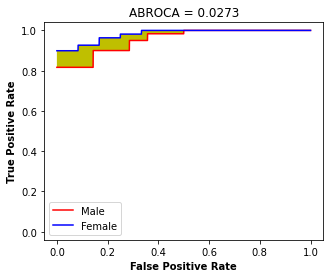

ABROCA: 0.027315844294307192


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.9090909090909091, 'accuracy': 0.9166666666666666, 'fairness': -0.2634349638078526, 'Positive_prot_pred': 0.851063829787234, 'Positive_non_prot_pred': 0.5876288659793815, 'Negative_prot_pred': 0.14893617021276595, 'Negative_non_prot_pred': 0.41237113402061853}
Equal opportunity
{'balanced_accuracy': 0.9090909090909091, 'accuracy': 0.9166666666666666, 'fairness': 0.03205128205128205, 'TPR_protected': 0.9487179487179487, 'TPR_non_protected': 0.9166666666666666, 'TNR_protected': 0.625, 'TNR_non_protected': 0.9459459459459459}
Equalized odds
{'balanced_accuracy': 0.9090909090909091, 'accuracy': 0.9166666666666666, 'fairness': 0.352997227997228, 'TPR_protected': 0.9487179487179487, 'TPR_non_protected': 0.9166666666666666, 'TNR_protected': 0.625, 'TNR_non_protected': 0.9459459459459459}
Predictive parity
{'balanced_accuracy': 0.9090909090909091, 'accuracy': 0.9166666666666666, 'fairness': 0.039912280701754344, 'TPR_protected': 0.9487179487179487, 'T

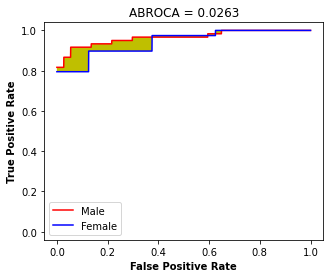

ABROCA: 0.02627137346852321


In [15]:
run_eval('xAPI-Edu')